In [9]:
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

img = cv2.imread('Ch_3_Basic_img_proc/fig/candies2.png', 0)

# 필터 제작
h, w = img.shape[:2]
rect_filter = np.zeros((h, w, 2), np.uint8)
n = 150
cv2.rectangle(rect_filter, ((w//2 - n//2), (h//2 - n//2), n, n), (1, 1), -1)

# 푸리에 변환
dft = cv2.dft(img.astype(np.float32), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
print(dft_shift.shape)

ft_output = 16*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
ft_output = cv2.normalize(ft_output, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
ft_output = ft_output.astype(np.uint8)

# 푸리에 역변환
dft_shift = dft_shift*rect_filter
inv_shift = np.fft.fftshift(dft_shift)
inv_dft = cv2.dft(inv_shift, flags = cv2.DFT_INVERSE)
inv_img = cv2.magnitude(inv_dft[:, :, 0], inv_dft[:, :, 1])
inv_img = cv2.normalize(inv_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

diff_img = cv2.absdiff(img, inv_img)

cv2.imshow('img', img)
cv2.imshow('dft_shift', dft_shift[:, :, 0])
cv2.imshow('ft_output', ft_output)
cv2.imshow('inv_img', inv_img)
cv2.imshow('diff_img', diff_img)
cv2.imshow('rect_filter', rect_filter[:, :, 0]*255)

cv2.waitKey()
cv2.destroyAllWindows()

(500, 800, 2)


In [10]:
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

img = cv2.imread('Ch_2_Opencv_basic/fig/puppy2.png')

if img is None:
    sys.exit('실패')
    
cv2.namedWindow('image')
cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 카메라

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("카메라 없음")
    cap.release()
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('save.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('오류')
        break
        
    cv2.imshow('frame', frame)
    out.write(frame)
    
    if cv2.waitKey(20) == 27:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [12]:
# 마우스 이벤트
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

oldx = oldy = 0
def call_mouse(event, x, y, flags, param):
    global oldx, oldy, img, img1
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (50, 120, 250), 3, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y

img = np.zeros((400, 1000, 3), np.uint8)*255
img1 = img.copy()

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

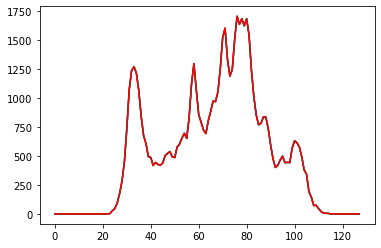

In [16]:
# 히스토그램
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

src = cv2.imread('Ch_3_Basic_img_proc/fig/lenna256.bmp', 1)
# hist = cv2.calcHist([src], [0], None, [128], [0, 256])

hist_b = cv2.calcHist([src], [0], None, [128], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [128], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [128], [0, 256])


cv2.imshow('src', src)

# plt.plot(hist)
plt.plot(hist_b, c = 'b')
plt.plot(hist_g, c = 'g')
plt.plot(hist_r, c = 'r')
plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
# normalize & equalizeHist
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

src = cv2.imread('Ch_4_Histogram_modi/fig/puppy_shrink.png', 0)

dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_qual = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_qual', dst_qual)

cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
# 색상 프로세싱
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

src = cv2.imread('Ch_4_Histogram_modi/fig/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_4)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
v_qual = cv2.equalizeHist(v)

dst_norm = cv2.merge((h, s, v_norm))
dst_qual = cv2.merge((h, s, v_qual))

dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR)
dst_qual = cv2.cvtColor(dst_qual, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_qual', dst_qual)

cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
# 색상 추출
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

src = cv2.imread('Ch_4_Histogram_modi/fig/flowers.jpg', 1)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

color_mask = cv2.inRange(src_hsv, (100, 150, 0), (135, 255, 255))

cv2.imshow('src', src)
cv2.imshow('color_mask', color_mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# 히스토그램 역변환
import numpy as np
import cv2
import sys
import time
import matplotlib.pyplot as plt

src = cv2.imread('Ch_4_Histogram_modi/fig/green.png', 1)
src = cv2.resize(src, (640, 480), interpolation = cv2.INTER_AREA)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

x, y, w, h = cv2.selectROI(src)
crop = src_ycrcb[y:y+h, x:x+w]

joint_hist = cv2.calcHist([crop], [1, 2], None, [256, 256], [0, 256, 0, 256])

back_pro = cv2.calcBackProject([src_ycrcb], [1, 2], joint_hist,
                              [0, 256, 0, 256], 1)

dst = cv2.copyTo(src, back_pro)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

## Google net 영상인식 모델


- 이미 학습된 모델을 활용함

In [39]:
import sys
import numpy as np
import cv2
########### googLeNet 영상인식
# <조건>
# 입력크기: 224 x 224
# 컬러: BGR
# 밝기평균값: (104, 117, 123)

# 사진 불러오기
file_name = 'Ch_4_Histogram_modi/fig/chromakey.png'
img = cv2.imread(file_name)

if img is None:
    sys.exit('실패')
    
# DNN 모델 불러오기
model = 'googlenet/bvlc_googlenet.caffemodel'
config = 'googlenet/deploy.prototxt'

# net 객체 생성
net = cv2.dnn.readNet(model, config)

if net.empty():
    print("네트워크 불러오기 실패")
    sys.exit()

# 클래스 불러오기
classNames = []
with open('googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n') # 빈칸에 대해서 나누고 리스트로 만듦
# 그냥 불러오면 이상하기 때문에 split을 해야함
# print(classNames[0])

# 모델 가공(사진 데이터 형태 매칭)
blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123),
                            swapRB = False)
net.setInput(blob)
output = net.forward()
# print(output)
# print(output.shape)
######################## 여기까지 공통 과정

out = output.flatten()
# print(out.shape)
class_id = np.argmax(out)
print("가장 큰 확률 인덱스 값 :", class_id)

confidence = out[class_id]
print("가장 큰 확률 : ", confidence*100)

category = classNames[class_id]
print("사진의 정체 : ", category)

# 출력 사진에 확률과 이름을 넣어보자
text = f'{classNames[class_id]} - {confidence*100:.2f}%'
cv2.putText(img, text, (20, 30), cv2.FONT_HERSHEY_COMPLEX,
           0.8, (150, 230, 50), 2, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

가장 큰 확률 인덱스 값 : 869
가장 큰 확률 :  25.350141525268555
사진의 정체 :  trench coat


## 사진 인식 + 반복문

In [25]:
import sys
import numpy as np
import cv2
import os
import time

img_list = os.listdir('sample_photo/googlenet/')

index = 0
while True:
    img = cv2.imread('sample_photo/googlenet/' + img_list[index])
    img = cv2.resize(img, (900, 600), interpolation = cv2.INTER_AREA)

    if img is None:
        sys.exit('실패')

#     DNN 모델 불러오기
    model = 'googlenet/googlenet-3.onnx'
    config = ''

    # net 객체 생성
    net = cv2.dnn.readNet(model, config)

    if net.empty():
        print("네트워크 불러오기 실패")
        sys.exit()

    # 클래스 불러오기
    classNames = []
    with open('googlenet/classification_classes_ILSVRC2012.txt', 'rt') as f:
        classNames = f.read().rstrip('\n').split('\n')

    # 모델 가공(사진 데이터 형태 매칭)
    blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123),
                                swapRB = False)
    net.setInput(blob)
    output = net.forward()

    out = output.flatten()
    class_id = np.argmax(out)
#     print("가장 큰 확률 인덱스 값 :", class_id)

    confidence = out[class_id]
#     print("가장 큰 확률 : ", confidence*100)

    category = classNames[class_id]
    print("사진의 정체 : ", category)


    text = f'{classNames[class_id]} - {confidence*100:.2f}%'
    cv2.putText(img, text, (20, 30), cv2.FONT_HERSHEY_COMPLEX,
               0.8, (150, 230, 50), 2, cv2.LINE_AA)

    cv2.imshow('img', img)

    if cv2.waitKey(3000) == 27:
        break
    index += 1
    if index >= len(img_list):
        index = 0
    
key = cv2.waitKey()
cv2.destroyAllWindows()

18


## 얼굴 인식 모델

In [35]:
import sys
import numpy as np
import cv2

img = cv2.imread('googlenet/face_detector/face1.jpg')
img = cv2.resize(img, (550, 400), interpolation = cv2.INTER_AREA)

model = 'googlenet/face_detector/opencv_face_detector_uint8.pb'
config = 'googlenet/face_detector/opencv_face_detector.pbtxt'

#모델 불러오기
face_net = cv2.dnn.readNet(model, config)

if face_net.empty():
    sys.exit('실패')
    
blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123),
                            swapRB = False)
face_net.setInput(blob)
out = face_net.forward()
# print(out.shape) # (1, 1, 200, 7)

detect = out[0, 0, :, :]
# print(detect.shape) # (200, 7)

h, w = img.shape[:2]

threshold = 0.5
for i in range(detect.shape[0]): # 200번
    print(i)
    confidence = detect[i, 2] # 바운딩 200개 중에 확률 부분
    
    if confidence > threshold: # 확률이 50% 넘는것만 잡아서 출력
        x1 = int(detect[i, 3]*w)
        y1 = int(detect[i, 4]*h)
        x2 = int(detect[i, 5]*w)
        y2 = int(detect[i, 6]*h)
        
        cv2.rectangle(img, (x1, y1), (x2, y2), (110, 23, 200), 2)
        text = f'Face : {confidence*100:.2f}%'
        cv2.putText(img, text, (x1, y1-9), cv2.FONT_HERSHEY_COMPLEX,
               0.7, (150, 230, 50), 1, cv2.LINE_AA)
        

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


얼굴인식 + 동영상

In [ ]:
import sys
import numpy as np
import cv2

img = cv2.imread('googlenet/face_detector/face1.jpg')
img = cv2.resize(img, (550, 400), interpolation = cv2.INTER_AREA)

model = 'googlenet/face_detector/opencv_face_detector_uint8.pb'
config = 'googlenet/face_detector/opencv_face_detector.pbtxt'

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('실패')
    sys.exit()
    cap.release()

#모델 불러오기
face_net = cv2.dnn.readNet(model, config)

if face_net.empty():
    sys.exit('실패')
    
while True:
    ret, img = cap.read()
    if not ret:
        print("오류")
        break
    
    blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123),
                                swapRB = False)
    face_net.setInput(blob)
    out = face_net.forward()
    # print(out.shape) # (1, 1, 200, 7)

    detect = out[0, 0, :, :]
    # print(detect.shape) # (200, 7)

    h, w = img.shape[:2]

    threshold = 0.5
    for i in range(detect.shape[0]): # 200번
        confidence = detect[i, 2]

        if confidence > threshold:
            x1 = int(detect[i, 3]*w)
            y1 = int(detect[i, 4]*h)
            x2 = int(detect[i, 5]*w)
            y2 = int(detect[i, 6]*h)

            cv2.rectangle(img, (x1, y1), (x2, y2), (110, 23, 200), 2)
            text = f'Face : {confidence*100:.2f}%'
            cv2.putText(img, text, (x1, y1-9), cv2.FONT_HERSHEY_COMPLEX,
                   0.7, (150, 230, 50), 1, cv2.LINE_AA)


    cv2.imshow('img', img)
    
    if cv2.waitKey(20) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

In [74]:
import sys
import numpy as np
import cv2

cap = cv2.VideoCapture('googlenet/face_detector/Woman - 62825.mp4')

model = 'googlenet/face_detector/opencv_face_detector_uint8.pb'
config = 'googlenet/face_detector/opencv_face_detector.pbtxt'

# cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('실패')
    sys.exit()
    cap.release()

#모델 불러오기
face_net = cv2.dnn.readNet(model, config)

if face_net.empty():
    sys.exit('실패')
    
while True:
    ret, img = cap.read()
    if not ret:
        print("오류")
        break
    
    blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123),
                                swapRB = False)
    face_net.setInput(blob)
    out = face_net.forward()
    # print(out.shape) # (1, 1, 200, 7)

    detect = out[0, 0, :, :]
    # print(detect.shape) # (200, 7)

    h, w = img.shape[:2]

    threshold = 0.5
    for i in range(detect.shape[0]): # 200번
        confidence = detect[i, 2]

        if confidence > threshold:
            x1 = int(detect[i, 3]*w)
            y1 = int(detect[i, 4]*h)
            x2 = int(detect[i, 5]*w)
            y2 = int(detect[i, 6]*h)

            cv2.rectangle(img, (x1, y1), (x2, y2), (110, 23, 200), 2)
            text = f'Face : {confidence*100:.2f}%'
            cv2.putText(img, text, (x1, y2+10), cv2.FONT_HERSHEY_COMPLEX,
                   0.7, (150, 230, 50), 1, cv2.LINE_AA)


    cv2.imshow('img', img)
    
    if cv2.waitKey(20) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

사진 픽셀화 후 다시 재조합

<class 'numpy.ndarray'>
(256, 256)
[[168 168 165 ... 115 118 122]]


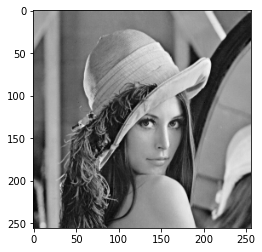

In [73]:
import sys
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

img = cv2.imread('Ch_3_Basic_img_proc/fig/lenna256.bmp', 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(type(img))
print(img.shape)
img_1 = img.reshape(1, 256*256)
print(img_1)
df = pd.DataFrame(data=img_1)
a = df.iloc[0, :]
a = np.array(a)
plt.imshow(a.reshape(256, 256), cmap = 'gray')
plt.show()